# TensorFlow 기초

## TensorFlow 알아보기

###   Computational Graph

In [1]:
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# numpy addition
a_np = np.array(10)
b_np = np.array(32)
out_np = a_np + b_np

print(a_np)
print(b_np)
print(out_np)

10
32
42


In [2]:
# tensorflow addition
a_tf = tf.constant(10)
b_tf = tf.constant(32)
out_tf = a_tf + b_tf

print(a_tf)
print(b_tf)
print(out_tf)
print("==========================================")

with tf.Session() as sess:
    print(sess.run(a_tf))
    print(sess.run(b_tf))
    print(sess.run(out_tf))
    print("==========================================")
    print(a_tf.eval())
    print(b_tf.eval())
    print(out_tf.eval())

Tensor("Const:0", shape=(), dtype=int32)
Tensor("Const_1:0", shape=(), dtype=int32)
Tensor("add:0", shape=(), dtype=int32)
10
32
42
10
32
42


In [3]:
# parameterize the graph to accept external input
a_tf = tf.placeholder(tf.float32)
b_tf = tf.placeholder(tf.float32)
out_tf = a_tf + b_tf

print(a_tf)
print(b_tf)
print(out_tf)
print("==========================================")

with tf.Session() as sess:
    print(sess.run(a_tf, {a_tf: 1.0}))
    print(sess.run(b_tf, {b_tf: 2.0}))
    print(sess.run(out_tf, {a_tf: 3.0, b_tf: 4.0}))
    print(sess.run(out_tf, {a_tf: 90.0, b_tf: 10.0}))

Tensor("Placeholder:0", dtype=float32)
Tensor("Placeholder_1:0", dtype=float32)
Tensor("add_1:0", dtype=float32)
1.0
2.0
7.0
100.0


### Vector 연산

In [4]:
# numpy
x = np.array([1., 1., 1., 1.])
y = np.array([2., 2., 2., 2.])
out = x + y
print("Numpy: {}".format(out))

Numpy: [3. 3. 3. 3.]


In [5]:
# tensorflow1
x = tf.constant([1., 1., 1., 1.])
y = tf.constant([2., 2., 2., 2.])
out = tf.add(x, y)

with tf.Session() as sess:
    print(out)
    print("Tensorflow: {}".format(sess.run(out)))

Tensor("Add_2:0", shape=(4,), dtype=float32)
Tensorflow: [3. 3. 3. 3.]


In [6]:
# tensorflow2
x = tf.constant([1., 1., 1., 1.])
y = tf.constant([2., 2., 2., 2.])
out = x + y

with tf.Session() as sess:
    print(out)
    print("Tensorflow: {}".format(sess.run(out)))

Tensor("add_3:0", shape=(4,), dtype=float32)
Tensorflow: [3. 3. 3. 3.]


### Matrix 연산

In [7]:
# matrix addition
x = tf.constant(1.0, shape=[2, 3])
y = tf.constant(np.reshape(np.arange(1.0, 7.0, dtype=np.float32), (2, 3)))
out = x + y

with tf.Session() as sess:
    print(x.eval())
    print("+")
    print(y.eval())
    print("=")
    print(sess.run(out))

[[1. 1. 1.]
 [1. 1. 1.]]
+
[[1. 2. 3.]
 [4. 5. 6.]]
=
[[2. 3. 4.]
 [5. 6. 7.]]


In [8]:
# matrix elementwise multiplication
x = tf.constant(2.0, shape=[2, 3])
y = tf.constant(np.reshape(np.arange(1.0, 7.0, dtype=np.float32), (2, 3)))
out = x * y

with tf.Session() as sess:
    print(x.eval())
    print(y.eval())
    print(sess.run(out))

[[2. 2. 2.]
 [2. 2. 2.]]
[[1. 2. 3.]
 [4. 5. 6.]]
[[ 2.  4.  6.]
 [ 8. 10. 12.]]


In [9]:
# matrix multiplication 
input_feature = tf.constant(
    np.reshape([1, 0, 0, 1], (1, 4)).astype(np.float32))
weights = tf.constant(np.random.randn(4, 2).astype(np.float32))
output = tf.matmul(input_feature, weights)

with tf.Session() as sess:
    print("input: \n{}".format(sess.run(input_feature)))
    print("weights: \n{}".format(sess.run(weights)))
    print("output: \n{}".format(sess.run(output)))

input: 
[[1. 0. 0. 1.]]
weights: 
[[-1.353634   -1.1152104 ]
 [ 1.1785998  -0.13006021]
 [ 0.6886279   0.2928361 ]
 [ 0.12511668 -0.40499303]]
output: 
[[-1.2285173 -1.5202035]]


### Useful operation

In [10]:
# reduce_mean, reduce_sum
x = tf.constant(np.reshape(np.arange(1.0, 7.0, dtype=np.float32), (2, 3)))
tf_mean = tf.reduce_mean(x)
tf_sum = tf.reduce_sum(x)
tf_mean_2 = tf.reduce_mean(x, axis=1)

with tf.Session() as sess:
    print(sess.run(x))
    print(sess.run(tf_mean))
    print(sess.run(tf_sum))
    print(sess.run(tf_mean_2))

[[1. 2. 3.]
 [4. 5. 6.]]
3.5
21.0
[2. 5.]


In [11]:
# argmax, argmin
x = tf.constant(np.reshape(np.arange(1.0, 7.0, dtype=np.float32), (2, 3)))
axis0 = tf.argmin(x, axis=0)
axis1 = tf.argmax(x, axis=1)

with tf.Session() as sess:
    print(sess.run(x))
    print(sess.run(axis0))
    print(sess.run(axis1))

[[1. 2. 3.]
 [4. 5. 6.]]
[0 0 0]
[2 2]


In [12]:
# equal
x = tf.constant(np.reshape(np.arange(1.0, 7.0, dtype=np.float32), (2, 3)))
y = tf.constant(np.reshape(np.arange(1.0, 7.0, dtype=np.float32), (2, 3)))
y_ = tf.constant(2.0, shape=[2, 3])
equal = tf.equal(x, y)
equal_ = tf.equal(x, y_)

with tf.Session() as sess:
    print(sess.run(equal))
    print(sess.run(equal_))

[[ True  True  True]
 [ True  True  True]]
[[False  True False]
 [False False False]]


In [13]:
# cast
x = tf.constant([True, True, False, False])
x_cast = tf.cast(x, tf.float32)

with tf.Session() as sess:
    print(x)
    print(sess.run(x))
    print(x_cast)
    print(sess.run(x_cast))

Tensor("Const_19:0", shape=(4,), dtype=bool)
[ True  True False False]
Tensor("Cast:0", shape=(4,), dtype=float32)
[1. 1. 0. 0.]


### 변수 변환 시켜보기

In [14]:
# define a variable and a constant
total = tf.Variable(tf.zeros([1, 2]))
inputs = tf.constant([1.0, 5.0])

# make op to update a variable
update_total = tf.assign(total, tf.add(total, inputs))

# make op to initialize declared variable
init = tf.global_variables_initializer()

with tf.Session() as sess:
    # initialize variables
    sess.run(init)
    
    # update variable 5 times
    for _ in range(5):
        sess.run(update_total)
        print("total: {}".format(sess.run(total)))

total: [[1. 5.]]
total: [[ 2. 10.]]
total: [[ 3. 15.]]
total: [[ 4. 20.]]
total: [[ 5. 25.]]


## 기본 예제

### Toy data 생성

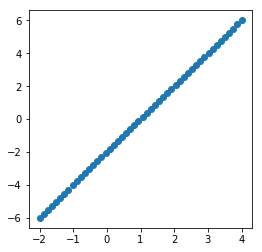

In [15]:
num_examples = 50
data = np.array([np.linspace(-2, 4, num_examples), np.linspace(-6, 6, num_examples)])
plt.figure(figsize=(4, 4))
plt.scatter(data[0], data[1])
plt.show()

### Noise 추가

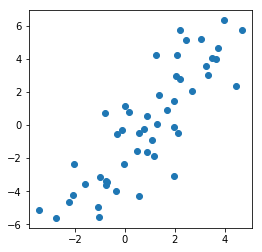

In [16]:
data += np.random.randn(2, num_examples)
plt.figure(figsize=(4, 4))
plt.scatter(data[0], data[1])
plt.show()

### Hyper-parameter 세팅

In [17]:
training_step = 50
learning_rate = 0.002

### 모델 정의 및 학습

In [18]:
tf.reset_default_graph()
x, y = data
x_with_bias = np.array([(1., a) for a in x]).astype(np.float32)

input = tf.constant(x_with_bias)
target = tf.constant(np.transpose([y]).astype(np.float32))
#weights = tf.Variable(tf.random_normal([2, 1], 0, 0.1))
init = tf.truncated_normal([2,1], stddev=.01)
weights = tf.get_variable('w', initializer=init)
y_hat = tf.matmul(input, weights)
y_error = tf.subtract(y_hat, target)
loss = tf.reduce_mean(tf.nn.l2_loss(y_error))

update_weights = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# Make op to initialize declared variable
init = tf.global_variables_initializer()

with tf.Session() as sess:
    # Initialize variables
    sess.run(init)
    
    # Training
    for step in range(training_step):
        _, loss_ = sess.run([update_weights, loss])
        print('iter: {}, loss: {}'.format(step, loss_))

InternalError: Blas GEMV launch failed:  m=2, n=50
	 [[node MatMul (defined at <ipython-input-18-57d53f68800e>:10)  = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Const, w/read)]]
	 [[{{node Mean/_1}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_22_Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'MatMul', defined at:
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/asyncio/base_events.py", line 438, in run_forever
    self._run_once()
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/asyncio/base_events.py", line 1451, in _run_once
    handle._run()
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2843, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2869, in _run_cell
    return runner(coro)
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3044, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3209, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3291, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-57d53f68800e>", line 10, in <module>
    y_hat = tf.matmul(input, weights)
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py", line 2057, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 4560, in mat_mul
    name=name)
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3274, in create_op
    op_def=op_def)
  File "/home/pirl/anaconda3/envs/TM/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

InternalError (see above for traceback): Blas GEMV launch failed:  m=2, n=50
	 [[node MatMul (defined at <ipython-input-18-57d53f68800e>:10)  = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Const, w/read)]]
	 [[{{node Mean/_1}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_22_Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [ ]:
from sklearn.linear_model import LinearRegression
x, y = data
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)
model.score(x, y)
plt.scatter(x, y)
plt.scatter(x, model.predict(x))

In [ ]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py 
# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


In [ ]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html#sphx-glr-auto-examples-linear-model-plot-logistic-py
# Code source: Gael Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

# General a toy dataset:s it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)


def model(x):
    return 1 / (1 + np.exp(-x))


loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()

### tf.get_variable()

In [ ]:
tf.reset_default_graph()
init = tf.truncated_normal([2,1], stddev=.01)
w1 = tf.get_variable('w1', initializer=init)
#w2 = tf.get_variable('w1', initializer=init)
w2 = tf.get_variable('w2', initializer=init)

with tf.variable_scope('fc1'):
    init = tf.truncated_normal([2,1], stddev=.01)
    w = tf.get_variable('w', initializer=init)
    
with tf.variable_scope('fc2'):
    init = tf.truncated_normal([2,1], stddev=.01)
    w = tf.get_variable('w', initializer=init)
    
# get_variable 써라 Variable말고, 그리고 RNN사용할때는
# AUTO_REUSE 사용해라
with tf.variable_scope('fc2', reuse = tf.AUTO_REUSE):
    init = tf.truncated_normal([2,1], stddev=.01)
    w = tf.get_variable('w', initializer=init)
    
    
    

In [ ]:
tf.trainable_variables()